In [234]:
### Step-lenght
### sum of angles
### Number of spikes


In [334]:
from src.utile import *
from src.metrics import *
import numpy as np
import matplotlib.pyplot as plt
import time
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
cameras = get_camera_names()
days = get_days_in_order()
camera, day = cameras[0], days[0]
print(camera, day)
batches = csv_of_the_day(camera, day, drop_out_of_scope=True)[1]


#mean_sd()


23520289 20210910_1550


In [74]:
for b in batches:
    c = calc_length_of_steps(b)
    m, sa = mean_sd(c), sum_of_angles(b)
    print(m, sa, len(b))

(0.37466555459917195, 1.2192206489892274) -267.0342336162735 6737
(0.8463271637012068, 0.5593609892478465) -326.140291042752 9998
(0.7679714910613318, 0.8643009623256221) -464.55691634854713 9999
(0.8192560318665729, 1.0638047232779972) -431.106016428941 8405


In [64]:
v = unit_vector([0, 1])
u = unit_vector([1,0])
alpha2 = angle(u,v)

cos, alpha1, alpha2, direction_angle(u, v)

(0.0, 1.5707963267948966, 1.5707963267948966, -1.5707963267948966)

<function src.metrics.meta_text_for_plot.<locals>.<lambda>()>

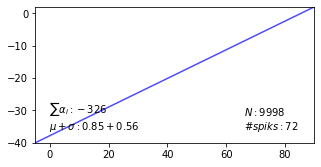

In [195]:
fig, ax = plt.subplots(figsize=(5,2.5))
is_back=False
xlim=[-5, 90]
ylim=[-40, 2]
if is_back: ylim=[-2, 40] 
ax.set_ylim(ylim)
#ax.set_xlabel('x coordinate')
ax.set_xlim(xlim)
line, = ax.plot(xlim, ylim,'b-', alpha=0.7, solid_capstyle="projecting")

lam = meta_text_for_plot(ax, batches[0], is_back=is_back)
lam()
meta_text_for_plot(ax, batches[1], is_back=is_back)


In [80]:
v = [1,1]
v_norm = np.linalg.norm(v)
u = [0.1,1]
u_norm = u = np.linalg.norm(u)
alpha = np.arccos(np.dot([0.3,1],[1,1])/(1*v_norm))
a = np.array([1,2,3,4])
a.size

4

3.141592653589793

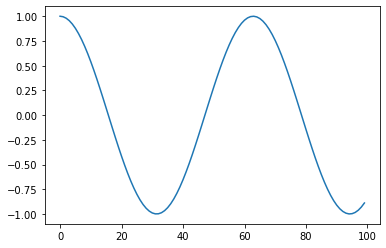

In [148]:
plt.plot([np.cos(x) for x in np.arange(0,10,0.1)])
np.arccos(0)

In [229]:
%prun -l 8 data = [csv_of_the_day(cameras[0],d, drop_out_of_scope=True) for d in days]

         2018145 function calls (1996898 primitive calls) in 3.963 seconds

   Ordered by: internal time
   List reduced from 649 to 8 due to restriction <8>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      235    1.801    0.008    1.887    0.008 {method 'read' of 'pandas._libs.parsers.TextReader' objects}
      235    0.408    0.002    0.486    0.002 parsers.py:1853(__init__)
413180/412710    0.093    0.000    0.151    0.000 {built-in method builtins.isinstance}
      607    0.068    0.000    0.071    0.000 base.py:1764(is_unique)
     1823    0.064    0.000    0.064    0.000 {built-in method _codecs.utf_8_decode}
     1777    0.043    0.000    0.045    0.000 glob.py:117(_iterdir)
   151708    0.040    0.000    0.055    0.000 generic.py:30(_check)
     1684    0.033    0.000    0.039    0.000 {pandas._libs.lib.infer_dtype}

In [337]:
data = csv_of_the_day(cameras[0],days[1], drop_out_of_scope=True)

In [328]:
import glob
filename = glob.glob("{}/{}/{}*/*.csv".format(dir_front, cameras[1], days[1]), recursive=True)[0]
print(filename, dir_front, cameras[0], days[1])                   
df = dd.read_csv(filename,skiprows=3, delimiter=';', error_bad_lines=False, usecols=["x", "y", "FRAME", "time", "xpx", "ypx"])
df = df.dropna()
df = dask.compute(df)[0]
indexNames = df[ df['x'] == -1].index
df = df.drop(indexNames)

../FE_block1_autotracks_front/23484201/20210911_060000.23484201/23484201_20210911_060000.23484201_000005_2021-11-13T13_28_44_6588.csv ../FE_block1_autotracks_front 23520289 20210911_0600


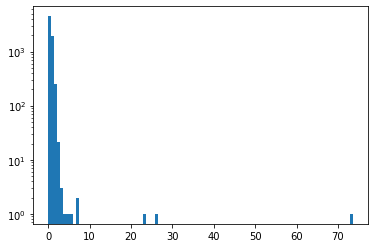

In [129]:
h=plt.hist(c,log=True, bins=100)

In [212]:
import re
if re.search(r'[0...9].*\.csv$', "asf_0234s.csv"):
    print("True")

True


In [215]:
f = "asf_0234s.csv"
f[-10:]

'_0234s.csv'